# Atividade 6 - Arthur Cerveira
## Exercício 1: Filtragem no Domínio das Frequências

O exercício 1 consiste em na implementação de uma função que filtre uma imagem no domínio das Transformadas de acordo com seus parâmetros, exibindo essa imagem filtrada e retornando o nome do arquivo. A imagem original está apresentada abaixo. Para aplicar o filtro na imagem, é necessário o redimensionar para o mesmo tamanho da imagem, então binarizar e multiplicar esse filtro pela imagem com o operador `.*`, para evitar que seja feita uma multiplicação matricial.

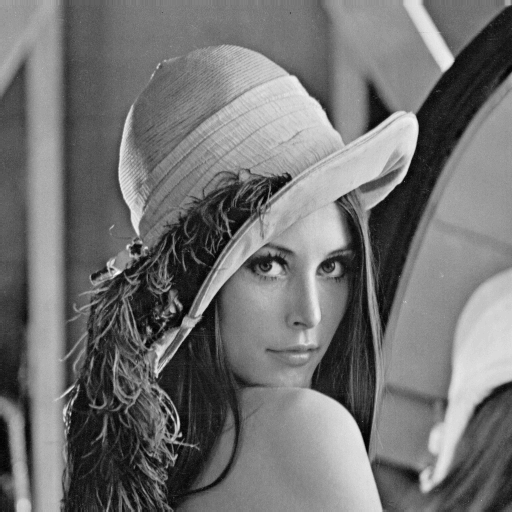

In [1]:
lenna = imread('./images/lena_cinza.bmp');
imshow(lenna);

In [2]:
pkg load image


function img_filtrada = filtra_freq(imagem, mascara)
    % Receba uma imagem em escala de cinzas;
    image = imread(imagem);
    [width, height] = size(image);
    
    % Receba uma máscara para filtragem no domínio das frequências;
    filter = imread(mascara);
        
    resized_filter = imresize(filter, [width, height]);
    
    bw_filter = im2bw(resized_filter(:, :, 1), 0.5);
    
    % Transforme a imagem para o domínio de Fourier
    transform = fft2(image);
    
    % Posicione a frequência zero no centro;
    shift_transform = fftshift(transform);
    
    % Exiba e salve o espectro de Fourier em um arquivo imagem;
    imshow(log(abs(shift_transform)));
    imwrite(log(abs(shift_transform)), "./images/transform.jpg");
    
    % Aplique a máscara/filtro utilizando multiplicação;
    result = bw_filter .* shift_transform;
    
    % Reconstrua a imagem filtrada;
    reconstructed = ifft2(ifftshift(result));
    
    % Exiba a nova imagem filtrada;
    imshow(reconstructed, []);
   
    % Retorne como resultado o nome do arquivo gerado com a nova imagem.
    img_filtrada = "./images/imagem_filtrada.jpg";
    imwrite(log(abs(reconstructed)), img_filtrada);
endfunction

    imshow at line 177 column 5
    filtra_freq at line 30 column 5


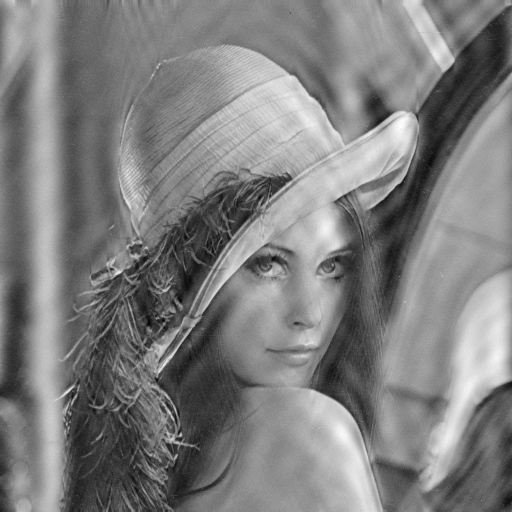

In [3]:
img = filtra_freq('./images/lena_cinza.bmp', "./filters/elimina-bordas-verticais.png");

    imshow at line 177 column 5
    filtra_freq at line 30 column 5


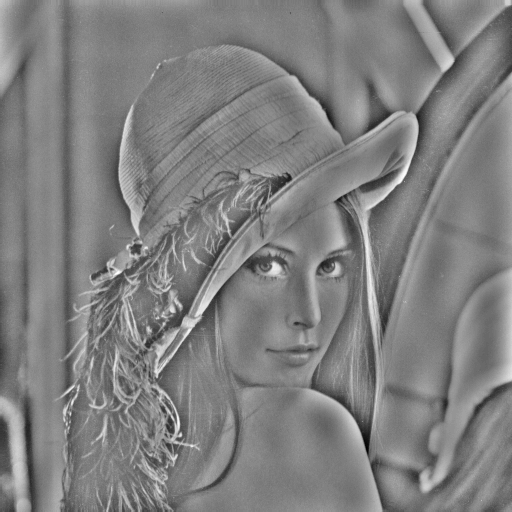

In [4]:
img = filtra_freq('./images/lena_cinza.bmp', "./filters/passa-baixas.png");

    imshow at line 177 column 5
    filtra_freq at line 30 column 5


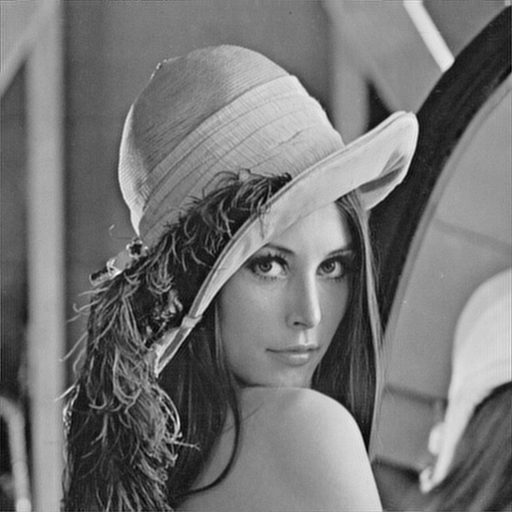

In [5]:
img = filtra_freq('./images/lena_cinza.bmp', "./filters/passa-altas.png");

    imshow at line 177 column 5
    filtra_freq at line 30 column 5


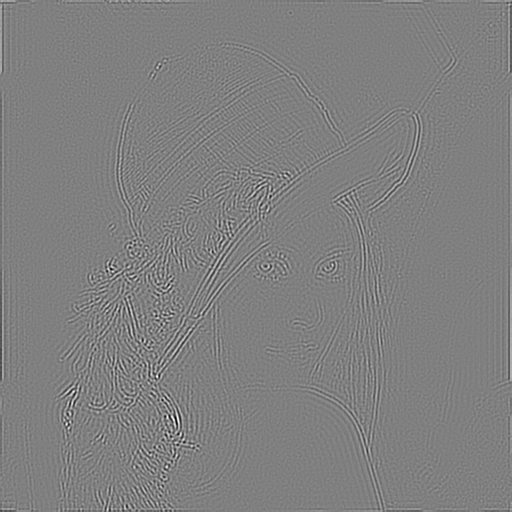

In [6]:
img = filtra_freq('./images/lena_cinza.bmp', "./filters/passa-faixa.png");

    imshow at line 177 column 5
    filtra_freq at line 30 column 5


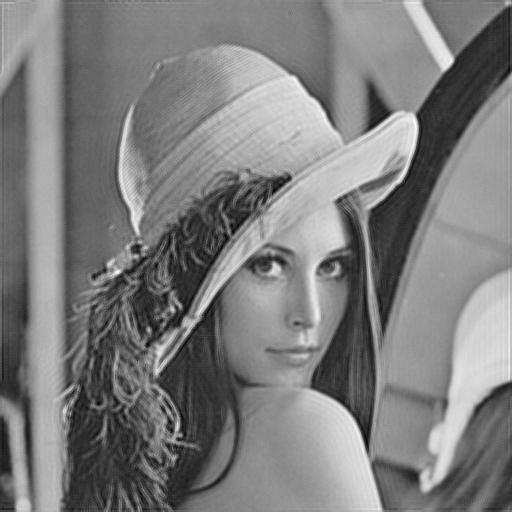

In [7]:
img = filtra_freq('./images/lena_cinza.bmp', "./filters/rejeita-faixa.png");